# Unsupervised learning of geometrical features from images by explicit group actions enforcement

<b> Luca Bottero (1), Francesco Calisto (2), Valerio Pagliarino (3) </b> <p>

(1) Università degli Studi di Torino (student), Machine Learning Journal Club <br>
(2) Ludwig-Maximilians-Universität München and Technische Universität München (student), Machine Learning Journal Club <br>
(3) Università degli Studi di Torino (student), Machine Learning Journal Club <br>
    
<p>
Proposal for <b> NeurReps Workshop </b> (NeurIPS conference), Symmetry and Geometry in Neural Representations. New Orleans, 3rd December 2022.
<p>
    

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F

from importlib import reload

import dataset
from dataset import dSpritesDataset
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

import model
from model import *

from tqdm import tqdm
torch.pi = torch.acos(torch.zeros(1)).item()

This example has full support for GPU acceleration

In [2]:
torch.cuda.is_available()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


### Dataset loading

In [4]:
dataset = dSpritesDataset()
l = dataset.__len__()
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [int(0.9*l), int(0.1*l)])
#train_dataset = train_dataset.to(device)
#test_dataset = test_dataset.to(device)
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=True)

### Model instantiation and training
- DisentangledAutoEncoder()
- UnifiedNet(64*64,512,128,28,132,16) (Baseline model for comparing results)

In [13]:
model = DisentangledAutoEncoder()
#model = UnifiedNet(64*64,512,128,28,132,16)

In [14]:
model.to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=8e-4)

loss_history = []
loss_history_test = []

for epoch in tqdm(range(50)):
    running_loss = 0
    running_loss_test = 0
    for img in train_loader:
        img = img.to(device)
        optimizer.zero_grad()
        
        final_image = model(img)
        final_image = final_image.to(device)
        loss = criterion(final_image, img)
        loss.backward()
        optimizer.step()
        lossitem = loss.item()
        running_loss += lossitem / 8.

    for img in test_loader:
        img = img.to(device)
        final_image = model(img)
        final_image = final_image.to(device)
        loss = criterion(final_image, img)
        lossitem = loss.item()
        running_loss_test += lossitem / 8.
    
    loss_history.append(running_loss / (125.*8./9.))
    loss_history_test.append(running_loss_test / (125./9.))
    print(epoch, "train", running_loss / (125.*8./9.))
    print(epoch, "test", running_loss_test / (125./9.))

  2%|▏         | 1/50 [00:09<07:34,  9.28s/it]

0 train 0.020783751928713172
0 test 0.01149363825051114


  4%|▍         | 2/50 [00:17<06:43,  8.40s/it]

1 train 0.012300210457819047
1 test 0.01050138784898445


  6%|▌         | 3/50 [00:24<06:13,  7.94s/it]

2 train 0.010646124593156855
2 test 0.008785112687386572


  8%|▊         | 4/50 [00:32<05:59,  7.82s/it]

3 train 0.009896102436818183
3 test 0.008309938439168036


 10%|█         | 5/50 [00:39<05:46,  7.70s/it]

4 train 0.009376553840003908
4 test 0.00804075813246891


 12%|█▏        | 6/50 [00:46<05:32,  7.55s/it]

5 train 0.008978255425288807
5 test 0.008257112345192582


 14%|█▍        | 7/50 [00:54<05:22,  7.51s/it]

6 train 0.008671584966417867
6 test 0.007612971652764827


 16%|█▌        | 8/50 [01:01<05:12,  7.43s/it]

7 train 0.008235212379950098
7 test 0.0074325734744779765


 18%|█▊        | 9/50 [01:10<05:24,  7.91s/it]

8 train 0.007970427848165854
8 test 0.006935463295318186


 20%|██        | 10/50 [01:18<05:14,  7.85s/it]

9 train 0.007617833570460789
9 test 0.0067499316665343935


 22%|██▏       | 11/50 [01:26<05:06,  7.87s/it]

10 train 0.007306591805478092
10 test 0.006448746529407799


 24%|██▍       | 12/50 [01:33<04:55,  7.78s/it]

11 train 0.007018275653914315
11 test 0.006365900515113026


 26%|██▌       | 13/50 [01:41<04:46,  7.75s/it]

12 train 0.006815119511273224
12 test 0.0063555580470710995


 28%|██▊       | 14/50 [01:48<04:31,  7.53s/it]

13 train 0.0067169078224687834
13 test 0.00607910174340941


 30%|███       | 15/50 [01:55<04:24,  7.55s/it]

14 train 0.00644291153823724
14 test 0.0059218197476584465


 32%|███▏      | 16/50 [02:03<04:18,  7.60s/it]

15 train 0.006271714949340094
15 test 0.006229029027745128


 34%|███▍      | 17/50 [02:11<04:08,  7.53s/it]

16 train 0.006140798827487743
16 test 0.005851429407019168


 36%|███▌      | 18/50 [02:19<04:05,  7.68s/it]

17 train 0.006048167619912419
17 test 0.005897686712443829


 38%|███▊      | 19/50 [02:26<03:59,  7.72s/it]

18 train 0.0058163434117741416
18 test 0.005642640691716224


 40%|████      | 20/50 [02:34<03:51,  7.71s/it]

19 train 0.005694184389867587
19 test 0.005595839562127366


 42%|████▏     | 21/50 [02:42<03:44,  7.74s/it]

20 train 0.005585882921208395
20 test 0.005533827742561698


 44%|████▍     | 22/50 [02:50<03:37,  7.76s/it]

21 train 0.005575944352196529
21 test 0.005313333668047562


 46%|████▌     | 23/50 [02:58<03:30,  7.79s/it]

22 train 0.0054445198191970115
22 test 0.0052917644747067245


 48%|████▊     | 24/50 [03:05<03:22,  7.78s/it]

23 train 0.005361524613050278
23 test 0.005600470548961311


 50%|█████     | 25/50 [03:13<03:14,  7.79s/it]

24 train 0.005295972167048603
24 test 0.005479053476359695


 52%|█████▏    | 26/50 [03:21<03:05,  7.74s/it]

25 train 0.005160127904702676
25 test 0.005190931635908782


 54%|█████▍    | 27/50 [03:28<02:54,  7.59s/it]

26 train 0.0051244255456840615
26 test 0.00537871996848844


 56%|█████▌    | 28/50 [03:36<02:46,  7.57s/it]

27 train 0.005071153113793116
27 test 0.005372732056304812


 58%|█████▊    | 29/50 [03:43<02:39,  7.60s/it]

28 train 0.005020800878555747
28 test 0.005589964501792565


 60%|██████    | 30/50 [03:51<02:35,  7.77s/it]

29 train 0.0049372478449658955
29 test 0.005038574781501666


 62%|██████▏   | 31/50 [03:59<02:28,  7.82s/it]

30 train 0.004957607973658014
30 test 0.005232749225338921


 64%|██████▍   | 32/50 [04:07<02:20,  7.82s/it]

31 train 0.004881211345607881
31 test 0.004983588478295132


 66%|██████▌   | 33/50 [04:16<02:17,  8.11s/it]

32 train 0.0047817335124418605
32 test 0.0049843005209695545


 68%|██████▊   | 34/50 [04:23<02:04,  7.80s/it]

33 train 0.004731195813190424
33 test 0.005033384853741154


 70%|███████   | 35/50 [04:30<01:54,  7.62s/it]

34 train 0.004689153013023315
34 test 0.005003839944256469


 72%|███████▏  | 36/50 [04:38<01:46,  7.59s/it]

35 train 0.0046723765390052
35 test 0.005009396659908816


 74%|███████▍  | 37/50 [04:45<01:37,  7.48s/it]

36 train 0.004567794279777445
36 test 0.005079016133677214


 76%|███████▌  | 38/50 [04:53<01:30,  7.52s/it]

37 train 0.004540867515897844
37 test 0.004895542785990983


 78%|███████▊  | 39/50 [05:00<01:23,  7.55s/it]

38 train 0.004547758368076756
38 test 0.005017082003876567


 80%|████████  | 40/50 [05:08<01:16,  7.67s/it]

39 train 0.004472036963881692
39 test 0.004834491993533447


 82%|████████▏ | 41/50 [05:16<01:10,  7.79s/it]

40 train 0.004430113421694841
40 test 0.004924291240749881


 84%|████████▍ | 42/50 [05:25<01:03,  8.00s/it]

41 train 0.004415933755575679
41 test 0.0050796194022987035


 86%|████████▌ | 43/50 [05:32<00:55,  7.94s/it]

42 train 0.004353423081542132
42 test 0.0047574320405256


 88%|████████▊ | 44/50 [05:40<00:47,  7.84s/it]

43 train 0.004294477630377514
43 test 0.004938388830749318


 90%|█████████ | 45/50 [05:48<00:38,  7.78s/it]

44 train 0.004259854741307208
44 test 0.005008249713806435


 92%|█████████▏| 46/50 [05:55<00:30,  7.64s/it]

45 train 0.004238791011564899
45 test 0.004786745024845004


 94%|█████████▍| 47/50 [06:02<00:22,  7.52s/it]

46 train 0.004245624879898969
46 test 0.005088560621486976


 96%|█████████▌| 48/50 [06:10<00:15,  7.55s/it]

47 train 0.004214468015183229
47 test 0.004678256361046806


 98%|█████████▊| 49/50 [06:18<00:07,  7.62s/it]

48 train 0.004228268638282315
48 test 0.004692148426780477


100%|██████████| 50/50 [06:25<00:00,  7.71s/it]

49 train 0.004160528441032511
49 test 0.004951199786039069


### Output visualization

Len:  1000 IDX:  721


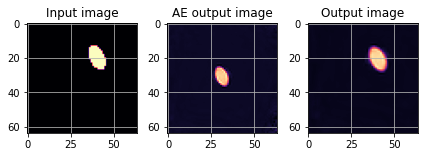

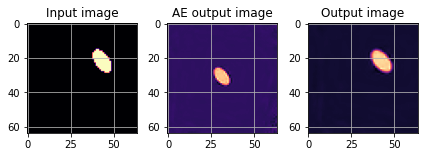

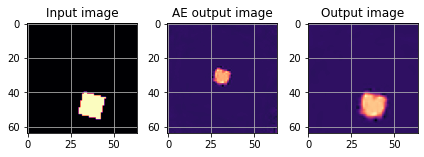

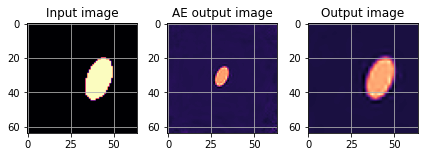

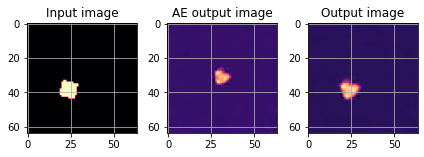

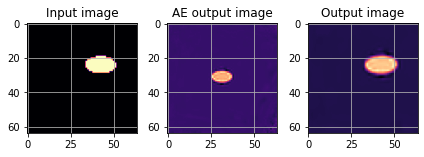

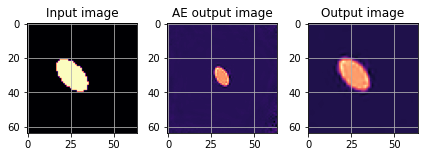

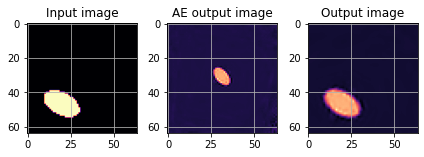

In [15]:
def visualize_results(model, input_batch, dataset_matrices, latent_matrices):
    input_batch = input_batch.to('cpu')
    model = model.to('cpu')

    try:
        model.affine_transformation = model.affine_transformation.to('cpu')
        #torch.save(model.affine_transformation, './Params/affine_transformation.pt')
        #model.affine_transformation = torch.load('./Params/affine_transformation.pt')

        model.AE_output = model.AE_output.to('cpu')
        #torch.save(model.AE_output, './Params/AE_output.pt')
        #model.AE_output = torch.load('./Params/AE_output.pt')

        res = model(input_batch, evaluate=True)
        
        lw = model.AE_output.detach().unsqueeze(axis=0).reshape(8,1,64,64)
        
        flow_field_d = F.affine_grid(
                dataset_matrices,
                lw.shape,
                align_corners=False
            )
            
        ctrl_d = F.grid_sample(lw.reshape(-1,1,64,64), flow_field_d, mode='bilinear')
        
        flow_field_l = F.affine_grid(
                latent_matrices,
                lw.shape,
                align_corners=False
            )
            
        ctrl_l = F.grid_sample(lw.reshape(-1,1,64,64), flow_field_l, mode='bilinear')

    except:
        res = model(input_batch)
    
    for i in range(input_batch.shape[0]):
        fig, axs = plt.subplots(1,3)
        img0 = axs[0].imshow(input_batch.detach().numpy()[i,0,:,:].reshape(64,64), cmap = 'magma')
        #plt.colorbar(img0, ax = axs[0])
        axs[0].set_title('Input image')
        axs[0].grid()
        
        try:
            img1 = axs[1].imshow(lw[i,0,:,:], cmap = 'magma')
            #plt.colorbar(img1, ax = axs[1])
            axs[1].set_title('AE output image')
            axs[1].grid()
        except:
            axs[1].imshow(res.detach().numpy()[i,0,:,:].reshape(64,64), cmap = 'magma')
            axs[1].set_title('Output image')
            axs[1].grid()
        
        try:
            img2 = axs[2].imshow(model.transformed_x.detach().numpy()[i,0,:,:].reshape(64,64), cmap = 'magma')
            axs[2].grid()
            axs[2].set_title('Output image')
            #plt.colorbar(img2, ax = axs[2])
        except:
            axs[2].imshow(res.detach().numpy()[i,0,:,:].reshape(64,64), cmap = 'magma')
            axs[2].grid()
            axs[2].set_title('Output image')
        
        fig.tight_layout()
        plt.show()


idx = int(np.random.random()*len(test_loader.dataset))

print('Len: ', len(test_loader.dataset), 'IDX: ', idx)

dataset_vars = test_loader.dataset.dataset.latents[idx: idx+8]
batch = test_loader.dataset[idx: idx+8]

def get_matrix_from_vars(group):
    
    sx, sy, rot, t1x, t1y = group[:, 2], group[:, 2], group[:, 3], group[:, 4], group[:, 5]
    batch_size = group.size()[0]

    sx, sy = torch.abs(sx), torch.abs(sy)
    cRot = torch.cos(rot*2*torch.pi)
    sRot = torch.sin(rot*2*torch.pi)

    matRes = torch.zeros((batch_size, 2, 3))
    matRes[:, 0, 0] = sx*cRot
    matRes[:, 0, 1] = sy*-sRot
    matRes[:, 0, 2] = t1x*sx*cRot + t1y*sy*-sRot
    matRes[:, 1, 0] = sx*sRot
    matRes[:, 1, 1] = sy*cRot
    matRes[:, 1, 2] = t1x*sx*sRot + t1y*sy*cRot
    
    return matRes

try:
    latent_matrices = model.group_action_matrices.detach()
except:
    latent_matrices = torch.Tensor([[1,0,0],[0,1,0]])

dataset_matrices = get_matrix_from_vars(dataset_vars)

visualize_results(model, batch, dataset_matrices, latent_matrices)

### Loss-function tracking

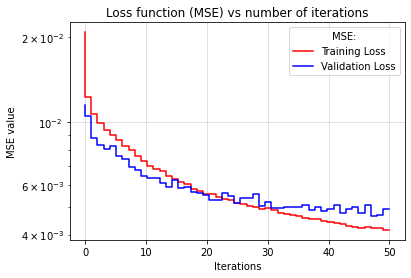

In [16]:
testLoss   =  np.array(loss_history_test)
trainLoss  =  np.array(loss_history)

iterations = np.linspace(0, len(testLoss), len(testLoss))
plt.step(iterations, trainLoss, label = "Training Loss", color = 'red')
plt.step(iterations, testLoss, label = "Validation Loss", color = 'blue')
plt.grid(axis='x', color='0.85')
plt.grid(axis='y', color='0.85')
plt.yscale('log')
plt.legend(title='MSE:')
plt.title('Loss function (MSE) vs number of iterations')
plt.xlabel('Iterations')
plt.ylabel('MSE value')
plt.show()

### Geometric features analysis

In [17]:
#print(dataset_vars)

for lm, dm in zip(latent_matrices, dataset_matrices):
    print('Latent: \n', lm)
    print('Dataset: \n', dm)
    print('Diff: \n', lm-dm)
    print('-'*20)

Latent: 
 tensor([[ 0.8385, -0.0506, -0.1852],
        [ 0.0506,  0.8385, -0.0939]])
Dataset: 
 tensor([[ 0.1554, -0.5795, -0.3475],
        [ 0.5795,  0.1554,  0.2735]])
Diff: 
 tensor([[ 0.6831,  0.5290,  0.1623],
        [-0.5290,  0.6831, -0.3674]])
--------------------
Latent: 
 tensor([[ 0.4380, -0.1078,  0.0528],
        [ 0.1078,  0.4380,  0.1241]])
Dataset: 
 tensor([[ 0.1554, -0.5795, -0.3051],
        [ 0.5795,  0.1554,  0.2822]])
Diff: 
 tensor([[ 0.2826,  0.4717,  0.3578],
        [-0.4717,  0.2826, -0.1581]])
--------------------
Latent: 
 tensor([[ 0.7583, -0.0874, -0.0843],
        [ 0.0874,  0.7583,  0.1525]])
Dataset: 
 tensor([[ 0.1554, -0.5795, -0.2627],
        [ 0.5795,  0.1554,  0.2909]])
Diff: 
 tensor([[ 0.6029,  0.4922,  0.1783],
        [-0.4922,  0.6029, -0.1384]])
--------------------
Latent: 
 tensor([[ 0.8346, -0.1187, -0.0551],
        [ 0.1187,  0.8346,  0.2373]])
Dataset: 
 tensor([[ 0.1554, -0.5795, -0.4683],
        [ 0.5795,  0.1554,  0.3460]])
Diff

In [18]:
offset = torch.ones_like(model.t1x)*0.5
latent_vars = torch.stack((model.s, model.rot, model.t1x + offset, model.t1y + offset), -1).detach().to('cpu')
print(latent_vars)
print(latent_vars.size())
for lat, dat in zip(latent_vars, dataset_vars):
    print('Dataset: ', dat[2:])
    print('Latent: ', lat)
    print('Diff: ', lat-dat[2:])
    print('-'*20)

tensor([[ 0.7851,  0.0166,  0.2228,  0.8083],
        [ 0.7799,  0.0089,  0.1577,  0.7686],
        [ 0.6210,  0.0259,  0.3096, -0.0399],
        [ 0.4744,  0.0063,  0.1786,  0.4364],
        [ 0.8319,  0.0762,  0.7346,  0.2666],
        [ 0.6388,  0.0110,  0.1655,  0.7025],
        [ 0.5339,  0.0696,  0.6431,  0.5130],
        [ 0.5346,  0.1006,  0.8542, -0.0088]])
torch.Size([8, 4])
Dataset:  tensor([0.6000, 2.4166, 0.2903, 0.6774], dtype=torch.float64)
Latent:  tensor([0.7851, 0.0166, 0.2228, 0.8083])
Diff:  tensor([ 0.1851, -2.4001, -0.0675,  0.1309], dtype=torch.float64)
--------------------
Dataset:  tensor([0.6000, 2.4166, 0.3226, 0.6129], dtype=torch.float64)
Latent:  tensor([0.7799, 0.0089, 0.1577, 0.7686])
Diff:  tensor([ 0.1799, -2.4077, -0.1649,  0.1557], dtype=torch.float64)
--------------------
Dataset:  tensor([0.6000, 2.4166, 0.3548, 0.5484], dtype=torch.float64)
Latent:  tensor([ 0.6210,  0.0259,  0.3096, -0.0399])
Diff:  tensor([ 0.0210, -2.3907, -0.0452, -0.5883], dt

\begin{bmatrix}
s_x \cos \theta & - s_y \sin \theta & t_x s_x \cos \theta - t_y s_y \sin \theta \\
s_x  \sin \theta & s_y \cos \theta & t_x s_x \sin \theta + t_y s_y \cos \theta \\
0      & 0 & 1
\end{bmatrix}

In [19]:
dataset_vars = test_loader.dataset.dataset.latents[:,2:].numpy()
dataset_vars = dataset_vars[test_loader.dataset.indices]
offset = torch.ones_like(model.t1x).to(device)*0.5

model = model.to(device)

latent_vars = 0

for img in test_loader:
    img = img.to(device)
    res = model(img)
    _l_vars = torch.stack((model.s, model.rot, model.t1x + offset, model.t1y + offset), -1).detach().to('cpu').numpy()
    try:
        latent_vars = np.append(latent_vars, _l_vars, axis = 0)
    except:
        latent_vars = _l_vars

/opt/tljh/user/lib/python3.7/site-packages/torch/nn/functional.py:3982: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  "Default grid_sample and affine_grid behavior has changed "


In [20]:
print(latent_vars)
print('-'*20)
print(dataset_vars)

[[0.60064554 0.0572935  0.53540653 0.66073406]
 [0.6442113  0.06535062 0.62995815 0.36039948]
 [0.6802901  0.07824977 0.6866631  0.578613  ]
 ...
 [0.8593671  0.03460544 0.4090932  0.85772   ]
 [0.56227577 0.00672316 0.16756755 0.13145089]
 [0.45715392 0.08607672 0.7613152  0.11554924]]
--------------------
[[0.6        3.70546826 0.96774194 0.61290323]
 [0.5        5.96097068 0.70967742 0.74193548]
 [0.6        5.79986336 0.83870968 0.35483871]
 ...
 [0.9        0.64442926 0.41935484 0.19354839]
 [0.9        2.57771705 0.41935484 0.41935484]
 [0.5        6.28318531 0.29032258 0.4516129 ]]


In [21]:
print(latent_vars.shape, dataset_vars.shape, len(test_loader)*8)

(1000, 4) (1000, 4) 1000


(1000,) (1000,)


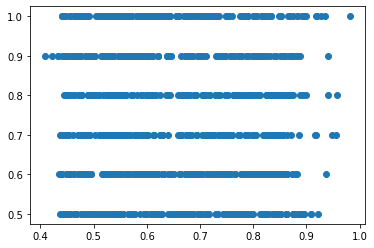

(1000,) (1000,)


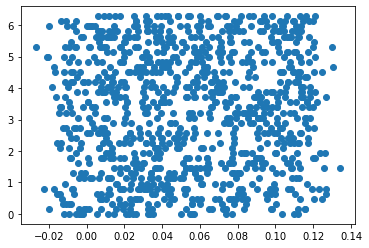

(1000,) (1000,)


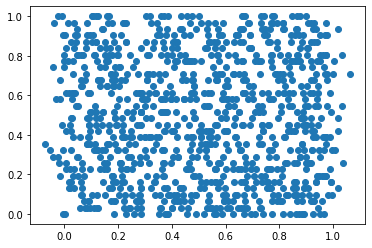

(1000,) (1000,)


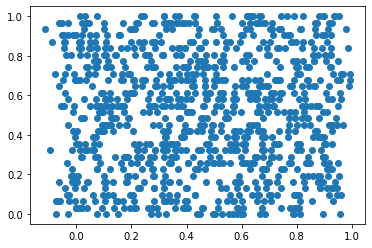

In [22]:
for d,l in zip(latent_vars.T, dataset_vars.T):
    print(d.shape, l.shape)
    plt.scatter(d,l)
    plt.show()

In [23]:
len(test_loader.dataset.indices)

1000